In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
train = pd.read_csv('train.csv', encoding='utf-8')
train.Stage = (train.Stage=='Closed Won').astype('int')

In [74]:
def hasData(t):
    for x in t:
        if x != 'None':
            return 1
    return 0

In [75]:
train['Product_Category_B'] = train.groupby('Opportunity_ID')['Product_Category_B'].transform(hasData)
train['Price'] = train.groupby('Opportunity_ID')['Price'].transform(hasData)
train['Size'] = train.groupby('Opportunity_ID')['Size'].transform(hasData)
train['Product_Type'] = train.groupby('Opportunity_ID')['Product_Type'].transform(hasData)
train['Brand'] = train.groupby('Opportunity_ID')['Brand'].transform(hasData)
train['Currency'] = train.groupby('Opportunity_ID')['Currency'].transform(hasData)
    
data = train.loc[:, ['Product_Category_B', 'Price', 'Size', 'Product_Type', 'Brand', 'Currency']]
train['Or'] = ((train.Product_Category_B)|(train.Price)|(train.Size)|(train.Product_Type)|(train.Brand)|(train.Currency)).astype('int')

Text(0.5, 1.0, 'Correlación entre los features transformados')

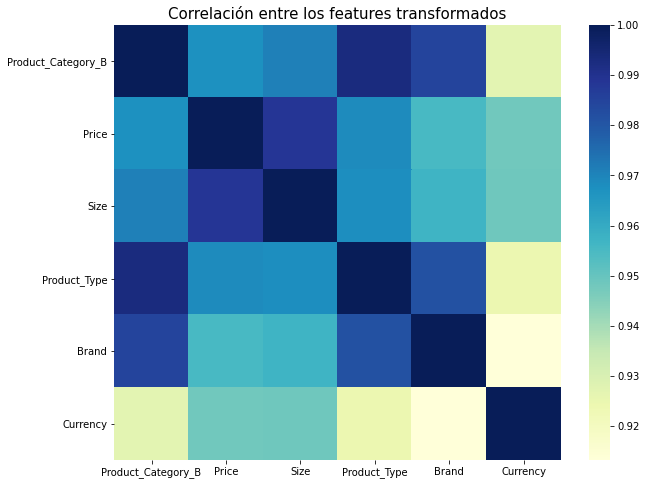

In [76]:
#train = train.drop(columns=['Opportunity_ID', 'Stage'])

corr = data.corr().abs()

fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
sns.heatmap(corr, cmap='YlGnBu')
ax.set_title('Correlación entre los features transformados', fontsize = 15)

In [77]:
train['And'] = ((train.Product_Category_B)&(train.Price)&(train.Size)|\
                (train.Product_Type)&(train.Brand)&(train.Currency)).astype('int')

In [78]:
ors = train.loc[:, ['Or', 'And', 'Product_Category_B', 'Price', \
              'Size', 'Product_Type', 'Brand', 'Currency', 'Stage', 'Opportunity_ID']]

In [79]:
ors = ors.drop_duplicates(subset='Opportunity_ID')

In [80]:
def data(orr, andd):
    dt = []
    for i in range (len(orr)):
        if orr[i]==andd[i]:
            dt.append('Todos iguales')
        else:
            dt.append('Distintos')
            
    return dt

In [81]:
ors['Visu'] = data(ors.Or.to_list(), ors.And.to_list())

In [82]:
ors.loc[:, ['Or', 'And', 'Visu']]

,Or,And,Visu
0,0,0,Todos iguales
1,0,0,Todos iguales
2,0,0,Todos iguales
3,1,1,Todos iguales
4,1,1,Todos iguales
...,...,...,...
16939,0,0,Todos iguales
16940,0,0,Todos iguales
16942,0,0,Todos iguales
16945,0,0,Todos iguales


In [83]:
visu = ors.groupby('Visu').agg({'Or':'count'}).reset_index()

In [84]:
visu.columns = ['Datos en las columnas', 'Cantidad de oportunidades']

Text(0.5, 1.0, 'Oportunidades con datos iguales')

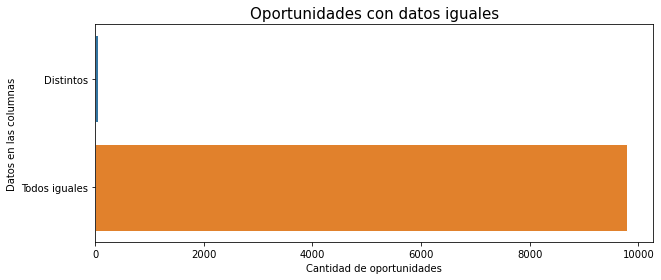

In [85]:
import seaborn as sns

f, ax = plt.subplots(figsize = (10, 4))
sns.barplot(y = 'Datos en las columnas',
            x = 'Cantidad de oportunidades',
            data = visu,
            edgecolor = 'w')

ax.set_title('Oportunidades con datos iguales', fontsize = 15)

In [86]:
final = ors.groupby('Stage').agg({'Or':'value_counts', 'And':'value_counts'})
final

Or   And
Stage Or            
0     0   4086  4144
      1    683   625
1     0   5072  5072

In [87]:
final.columns = ['o', 'a']
final
final = final.reset_index()
final.columns = ['Stage', 'Bool', 'Or', 'And']

In [88]:
final

,Stage,Bool,Or,And
0,0,0,4086,4144
1,0,1,683,625
2,1,0,5072,5072


In [89]:
and_or = pd.DataFrame([['Or', 683],
                       ['And', 625]])

and_or.columns = ['Método usado', 'Cantidad de oportunidades perdidas']

Text(0.5, 1.0, 'Oportunidades perdidas según método usado para juntar las variables')

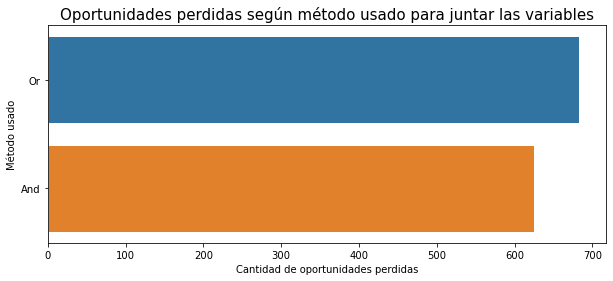

In [90]:
f, ax = plt.subplots(figsize = (10, 4))
sns.barplot(y = 'Método usado',
            x = 'Cantidad de oportunidades perdidas',
            data = and_or,
            edgecolor = 'w')

ax.set_title('Oportunidades perdidas según método usado para juntar las variables', fontsize = 15)

In [91]:
train_set = pd.read_csv('train_prepared.csv', encoding='utf-8')

In [92]:
X = train_set.drop(columns=['Opportunity_ID', 'Target'])

correlation_matrix = X.corr().abs()

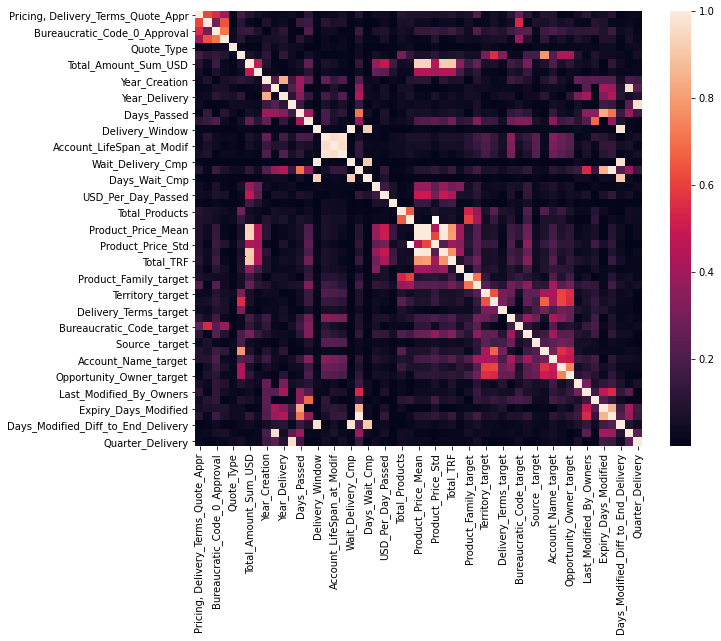

In [93]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
sns.heatmap(correlation_matrix, ax=ax)

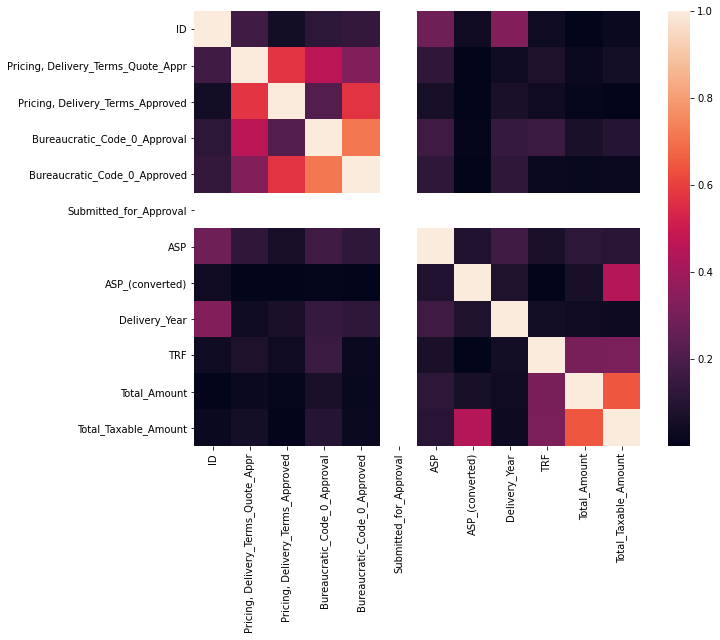

In [94]:
train = pd.read_csv('train.csv', encoding='utf-8')
train = train.drop(columns=['Opportunity_ID', 'Stage'])

corr = train.corr().abs()

fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
sns.heatmap(corr, ax=ax)

In [95]:
train = pd.read_csv('train.csv', encoding='utf-8')

def sum_strings(t):
    res = ''
    for x in t:
        res = res + x
    return res

train['PNApp'] = train.groupby('Opportunity_ID')['Product_Name'].transform(sum_strings)
train['PFApp'] = train.groupby('Opportunity_ID')['Product_Family'].transform(sum_strings)

In [96]:
train_prods = train.loc[:, ['Opportunity_ID', 'PNApp', 'PFApp']].drop_duplicates(subset='Opportunity_ID')

In [97]:
test = pd.read_csv('test.csv', encoding='utf-8')

test['PNApp'] = test.groupby('Opportunity_ID')['Product_Name'].transform(sum_strings)
test['PFApp'] = test.groupby('Opportunity_ID')['Product_Family'].transform(sum_strings)

In [98]:
test_prods = test.loc[:, ['Opportunity_ID', 'PNApp', 'PFApp']].drop_duplicates(subset='Opportunity_ID')

In [99]:
trainPN = train.PNApp.to_list()
trainPF = train.PFApp.to_list()

In [100]:
test_prods['PNAppInTrain'] = test_prods.PNApp.apply(lambda x: 1 if x in trainPN else 0)

In [101]:
test_prods['PFAppInTrain'] = test_prods.PFApp.apply(lambda x: 1 if x in trainPN else 0)

In [102]:
test_prods

,Opportunity_ID,PNApp,PFApp,PNAppInTrain,PFAppInTrain
0,10689,Product_Name_332Product_Name_315Product_Name_241,Product_Family_171Product_Family_167Product_Fa...,0,0
3,10690,Product_Name_328Product_Name_315Product_Name_2...,Product_Family_171Product_Family_167Product_Fa...,0,0
8,10691,Product_Name_484,Product_Family_223,0,0
9,10692,Product_Name_473Product_Name_473Product_Name_4...,Product_Family_221Product_Family_221Product_Fa...,0,0
15,10693,Product_Name_241,Product_Family_140,1,0
...,...,...,...,...,...
2545,12364,Product_Name_241Product_Name_447,Product_Family_140Product_Family_213,0,0
2547,12365,Product_Name_477,Product_Family_221,1,0
2548,12366,Product_Name_477,Product_Family_221,1,0
2549,12367,Product_Name_281,Product_Family_156,0,0


In [103]:
print(test_prods.PNAppInTrain.sum()/test_prods.PNAppInTrain.count())
test_prods.PFAppInTrain.sum()/test_prods.PFAppInTrain.count()

0.6643267389917039


0.0

In [104]:
print(test_prods.PNAppInTrain.sum())
test_prods.PNAppInTrain.count()

1041


1567

Text(0.5, 1.0, 'Cobertura de combinaciones de Product Name')

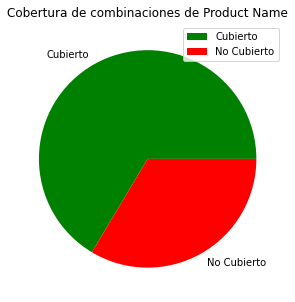

In [105]:
pr = pd.DataFrame({'': [1041, 526]}, \
                  index = ['Cubierto', 'No Cubierto'])

pr.plot.pie(y='', figsize=(5, 5), colors=['green', 'red'])
plt.title('Cobertura de combinaciones de Product Name')

In [109]:
test['PN_in_train'] = (test.Product_Name.apply(lambda x: 1 if x in train.Product_Name.to_list() else 0))

In [110]:
test['PF_in_train'] = (test.Product_Family.apply(lambda x: 1 if x in train.Product_Family.to_list() else 0))

In [111]:
test.loc[:, ['Opportunity_ID', 'PN_in_train', 'PF_in_train']]

,Opportunity_ID,PN_in_train,PF_in_train
0,10689,0,0
1,10689,1,1
2,10689,1,1
3,10690,0,0
4,10690,1,1
...,...,...,...
2546,12364,1,1
2547,12365,1,1
2548,12366,1,1
2549,12367,0,0


In [115]:
def andd(t):
    for x in t:
        if x == 0:
            return 0
    return 1

In [118]:
a = test.groupby('Opportunity_ID').agg({'PN_in_train':andd, 'PF_in_train':andd})
a

,PN_in_train,PF_in_train
Opportunity_ID,,
10689,0,0
10690,0,0
10691,0,1
10692,1,1
10693,1,1
...,...,...
12364,1,1
12365,1,1
12366,1,1


In [119]:
a.PN_in_train.sum()/a.PN_in_train.count()

0.8276962348436503

In [120]:
a.PF_in_train.sum()/a.PF_in_train.count()

0.8915124441608169